In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle
import cv2 
from sklearn.decomposition import PCA 


In [2]:
# load the data
data = pickle.load(open("./data_images_100_100.pkl" , mode = 'rb'))


Steps to find the eigen images for each image:

1. Compute the mean image : avg each pixel using values from all images 
2. Just to verify or check out : Visualize mean face 
3. Subtract meanface from cropped images
4. Pass these differenced pixels to PCA to get the eigen faces(number of columns based on elbow method ) 
5. Use the inverse Transform to get them to original shape (10000 columns)
6. 

In [3]:
data.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_9991', 'pixel_9992', 'pixel_9993', 'pixel_9994', 'pixel_9995',
       'pixel_9996', 'pixel_9997', 'pixel_9998', 'pixel_9999', 'gender'],
      dtype='object', length=10001)

In [4]:
X = data.iloc[:,:-1] 
y = data.iloc[:,-1]

In [5]:
# Mean face 

mean_face = X.mean(axis = 0) 
mean_face

pixel_0       0.380544
pixel_1       0.377810
pixel_2       0.374506
pixel_3       0.372414
pixel_4       0.367912
                ...   
pixel_9995    0.380855
pixel_9996    0.382938
pixel_9997    0.382669
pixel_9998    0.383245
pixel_9999    0.384881
Length: 10000, dtype: float64

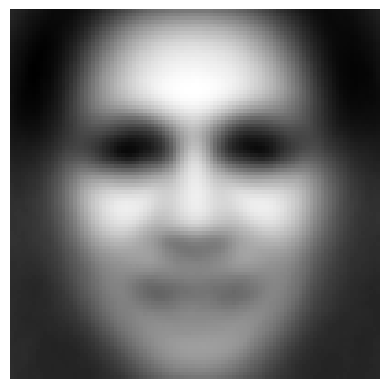

In [6]:
# Visualize the mean face 

plt.imshow(np.reshape(mean_face  ,(100,100)),cmap = 'grey')

plt.axis('off')
plt.show()

In [7]:
X_t = X - mean_face 

# transformed data 

In [8]:
X_t

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,0.399849,0.363366,0.358828,0.337390,0.349735,0.359439,0.338927,0.333764,0.379597,0.359695,...,0.044503,0.043009,0.047617,0.055202,0.066630,0.074047,0.091572,0.080076,0.075579,0.081786
1,-0.258975,-0.279771,-0.245094,-0.262610,-0.254186,-0.248404,-0.237543,-0.227021,-0.216481,-0.212854,...,-0.206478,-0.266795,-0.289638,-0.262445,-0.294155,-0.247521,-0.284899,-0.245415,-0.167559,-0.314293
2,-0.184465,-0.185654,-0.237251,-0.239081,-0.203206,-0.205267,-0.217936,-0.199570,-0.087069,-0.114815,...,0.432738,0.509676,0.514284,0.541476,0.548983,0.525028,0.487650,0.460468,0.448128,0.438648
3,0.152790,0.120229,0.072553,0.004056,0.008559,0.006498,0.009515,0.098470,0.230578,0.289106,...,-0.116282,-0.168756,-0.113167,-0.117347,-0.090233,-0.023992,-0.002546,0.021252,0.020677,-0.008410
4,0.537103,0.547680,0.543141,0.537390,0.530127,0.367282,0.185986,0.055332,-0.122364,-0.165796,...,0.562150,0.560656,0.549578,0.549319,0.556826,0.552479,0.550395,0.566350,0.561853,0.560217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,-0.313877,-0.311144,-0.311761,-0.305748,-0.301245,-0.295463,-0.288524,-0.285844,-0.283148,-0.291286,...,0.464111,0.490068,0.518206,0.533633,0.537218,0.548557,0.542552,0.538899,0.534402,0.528844
4890,-0.329563,-0.013104,-0.249016,-0.188101,-0.140461,-0.044483,0.174221,0.067097,0.105087,0.108714,...,0.542542,0.544970,0.529970,0.537555,0.533296,0.525028,0.519023,0.538899,0.557932,0.556295
4891,0.321417,0.328072,0.331377,0.337390,0.345814,0.355517,0.354613,0.349450,0.356068,0.363616,...,0.173914,0.168499,0.157421,0.176770,0.199963,0.226989,0.264121,0.291840,0.306951,0.344531
4892,-0.231524,-0.232712,-0.229408,-0.223395,-0.214971,-0.205267,-0.206171,-0.207413,-0.204716,-0.197168,...,-0.237850,-0.255030,-0.266108,-0.262445,-0.231409,-0.188698,-0.159408,-0.139532,-0.124421,-0.114293


In [9]:
pca = PCA(n_components = None , whiten = True , svd_solver = 'auto' )
pca.fit(X_t)

,n_components,None
,copy,True
,whiten,True
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [10]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1 , len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.251812,0.251812,1
1,0.119048,0.370859,2
2,0.105746,0.476605,3
3,0.052686,0.529291,4
4,0.032011,0.561302,5


In [11]:
exp_var_df.set_index('principal_components' , inplace = True)

In [12]:
exp_var_df.head()

,explained_var,cum_explained_var
principal_components,,
1,0.251812,0.251812
2,0.119048,0.370859
3,0.105746,0.476605
4,0.052686,0.529291
5,0.032011,0.561302


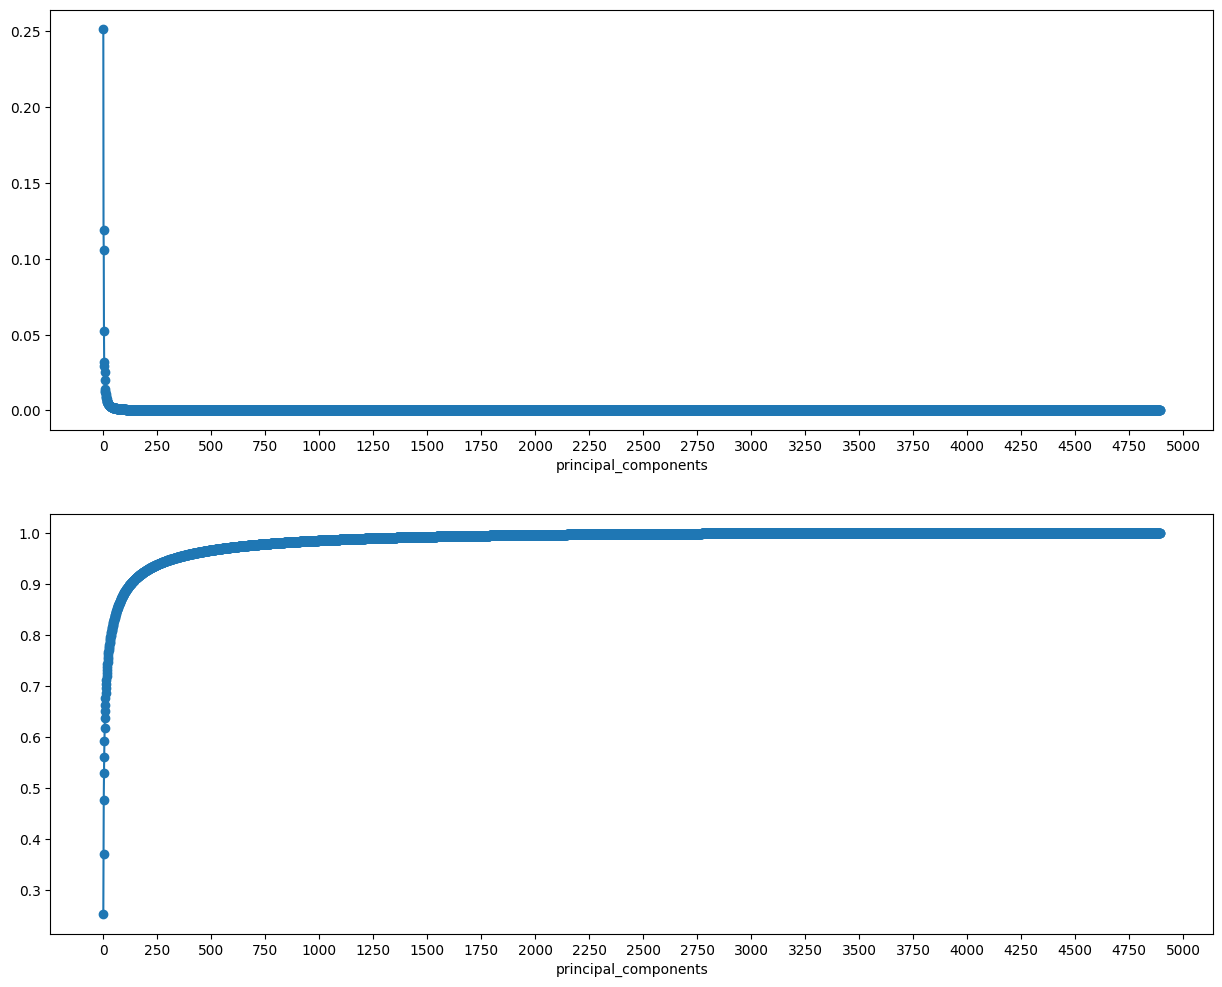

In [13]:
fig , ax = plt.subplots(nrows = 2 , figsize = (15,12))
exp_var_df['explained_var'].plot(kind = 'line' , marker = 'o' , ax = ax[0])
exp_var_df['cum_explained_var'].plot(kind = 'line' , marker = 'o' , ax = ax[1])
xticks = np.arange(0, 5001, 250)
ax[0].set_xticks(xticks)
ax[1].set_xticks(xticks)
plt.show()


we can take 250 components : which are sufficiently able to capture 90 % variance in the data

In [14]:
pca_250  = PCA(n_components=250 ,  whiten = True , svd_solver = 'auto')
pca_data = pca_250.fit_transform(X_t)



In [15]:
pca_data.shape

(4894, 250)

Saving the mean_face , pca model (pca_250) and pca_data

In [16]:
np.savez('./data_pca_250_target' , pca_data , y.values)

pca_dict = {'pca':pca_250 , 'mean_face' : mean_face}

pickle.dump(pca_dict , open('./model/pca_dict.pickle' , mode = 'wb'))

In [17]:
# Visualizing the eigen images : We need to inverse transform the PCA Data 

pca_data_inv = pca_250.inverse_transform(pca_data)
pca_data_inv.shape

(4894, 10000)

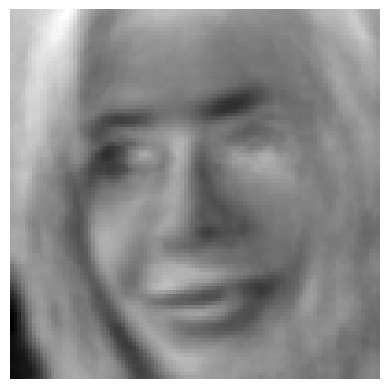

In [18]:
# Checking the eigen image for one face 

eig_img = pca_data_inv[0,:].reshape((100,100))
plt.imshow(eig_img ,cmap = 'gray')
plt.axis('off')
plt.show()

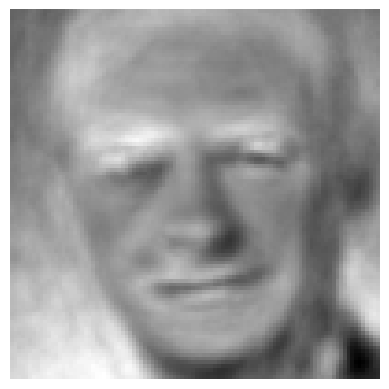

In [19]:
eig_img = pca_data_inv[3465,:].reshape((100,100))
plt.imshow(eig_img ,cmap = 'gray')
plt.axis('off')
plt.show()

In [20]:
X = X.values

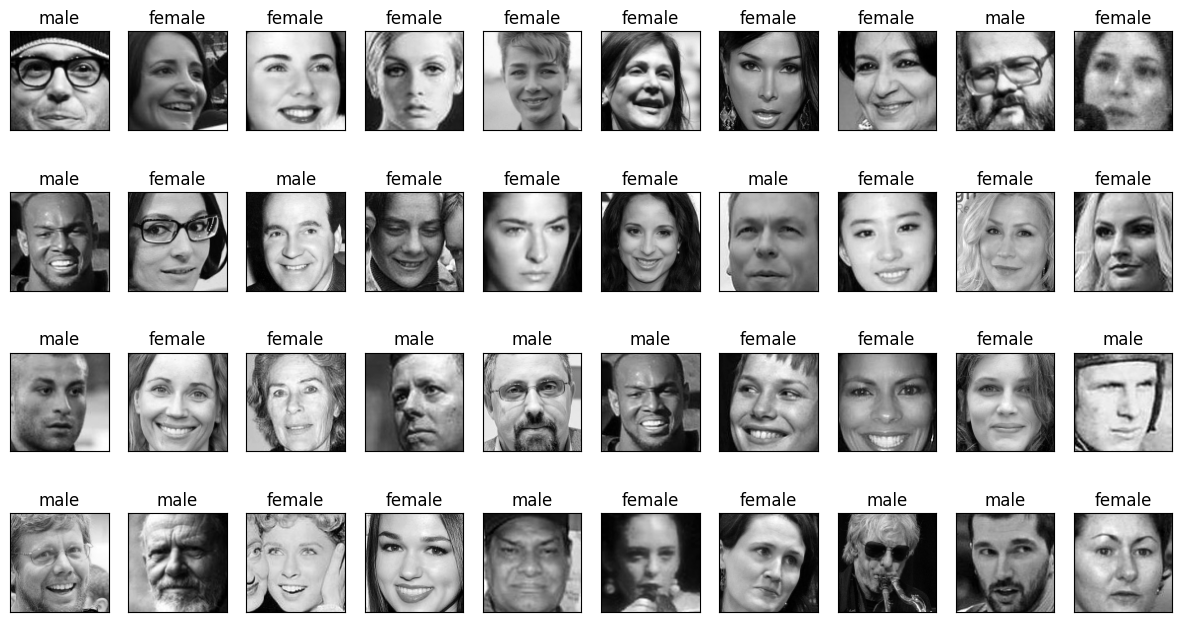

********************Eigen Image====================


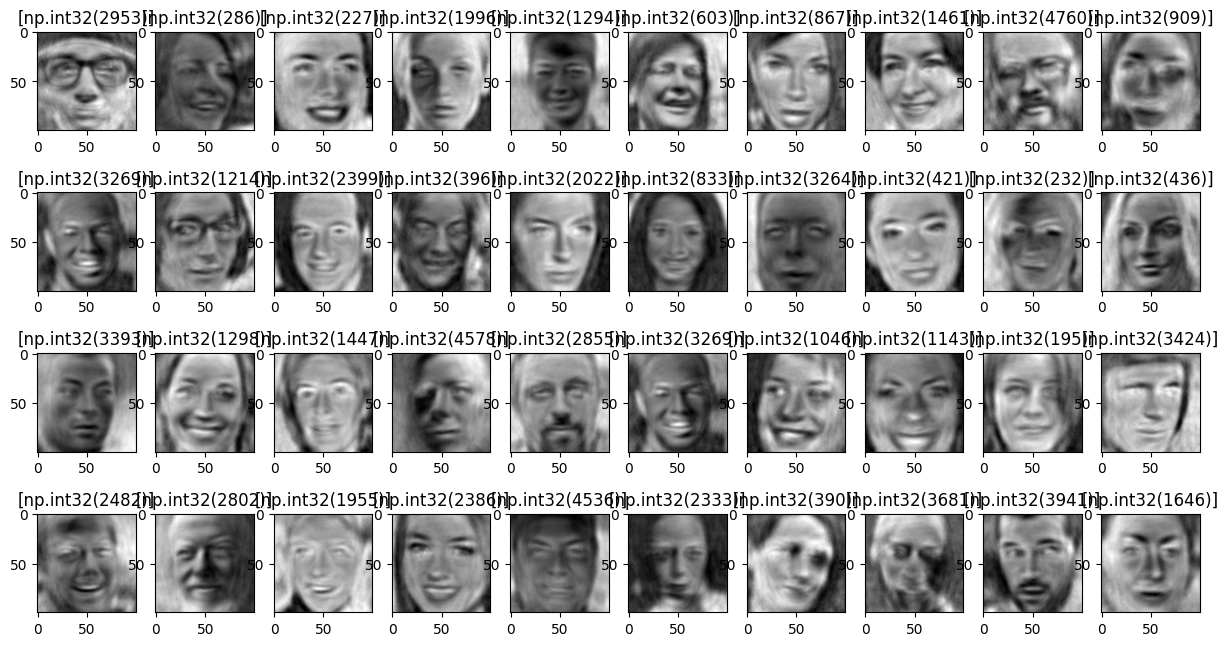

In [21]:
np.random.seed(1001)
pics = np.random.randint(0,len(pca_data_inv),40)
plt.figure(figsize= (15,8))

for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic : pic+1].reshape((100,100))
    plt.imshow(img , cmap = 'gray')
    plt.title(f"{y[pic]}")
    plt.xticks([])
    plt.yticks([])

plt.show()


print('*'*20 + "Eigen Image" + "="*20)

plt.figure(figsize = (15,8))
for i , pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic : pic+1].reshape((100,100))
    plt.imshow(img , cmap = 'gray')
    plt.title(f"{[pic]}")

plt.show()